In [90]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from analysis.tools import ffschema, sidm_processor
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)

<module 'analysis.tools.sidm_processor' from '/home/cms-jovyan/SIDM/analysis/test_notebooks/../../analysis/tools/sidm_processor.py'>

In [91]:
sample_dir = "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/"
sample_name = "SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6"
sample_file = f"{sample_dir}/{sample_name}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_161703/0000/ffNtuple_1.root"

events = NanoEventsFactory.from_root(
    sample_file,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "sample" : sample_name, 
    },
).events()

In [92]:
events.pv.fields

['rho', 'z', 'isFake', 'ndof', 'normChi2']

In [93]:
p = sidm_processor.SidmProcessor()
out = p.process(events)

In [94]:
out

{'SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6': {'cutflow': <analysis.tools.cutflow.Cutflow at 0x7fd7a7afe760>,
  'hists': {'pv_n': Hist(Regular(100, 0, 100, name='pv_n', label='pv_n'), storage=Int64()) # Sum: 18359.0,
   'pv_ndof': Hist(Regular(20, 0, 20, name='pv_ndof', label='pv_ndof'), storage=Int64()) # Sum: 206795.0 (480188.0 with flow),
   'pv_z': Hist(Regular(100, -50, 50, name='pv_z', label='pv_z'), storage=Double()) # Sum: 480188.0,
   'pv_rho': Hist(Regular(100, -0.5, 0.5, name='pv_rho', label='pv_rho'), storage=Double()) # Sum: 480188.0,
   'lj_n': Hist(Regular(10, 0, 10, name='lj_n', label='lj_n'), storage=Int64()) # Sum: 18359.0,
   'lj_charge': Hist(Regular(10, -5, 5, name='lj_charge', label='lj_charge'), storage=Int64()) # Sum: 37568.0,
   'lj_type': Hist(Regular(10, 0, 10, name='lj_type', label='lj_type'), storage=Int64()) # Sum: 37568.0,
   'lj_pt': Hist(Regular(100, 0, 100, name='lj_pt', label='lj_pt'), storage=Double()) # Sum: 37440.0 (37568.0 with flow),
   'lj_0_pt

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd7a7afe2e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

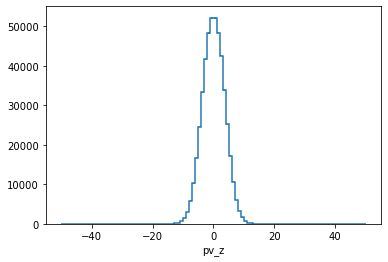

In [95]:
out[sample_name]["hists"]["pv_z"].plot1d()

In [96]:
out[sample_name]["cutflow"].print_table()

cut name        passing individual cut    passing all cuts
------------  ------------------------  ------------------
No selection                     18359               18359
PV filter                        18359               18359
Cosmic veto                      18359               18359


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd7a7a2e9d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

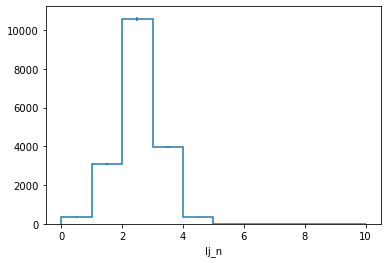

In [97]:
out[sample_name]["hists"]["lj_n"].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd7a799e220>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

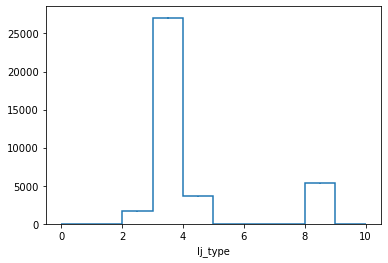

In [98]:
out[sample_name]["hists"]["lj_type"].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd7a79177c0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

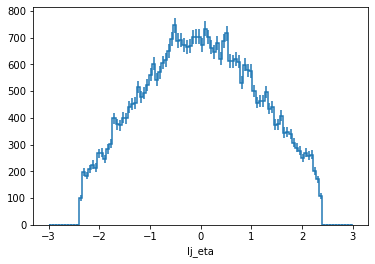

In [99]:
out[sample_name]["hists"]["lj_eta"].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd7a78b3100>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

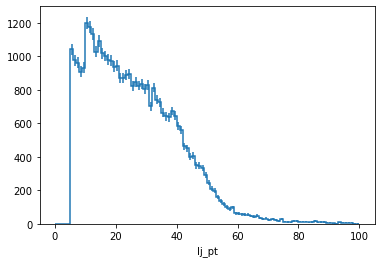

In [100]:
out[sample_name]["hists"]["lj_pt"].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd7a77c4f10>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

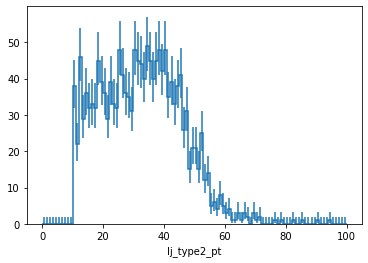

In [101]:
out[sample_name]["hists"]["lj_type2_pt"].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd7a7770400>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

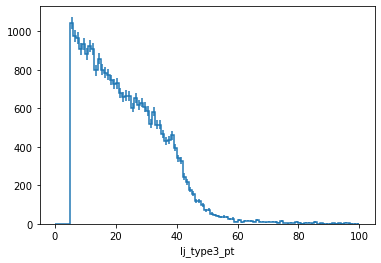

In [102]:
out[sample_name]["hists"]["lj_type3_pt"].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd7a7684b20>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

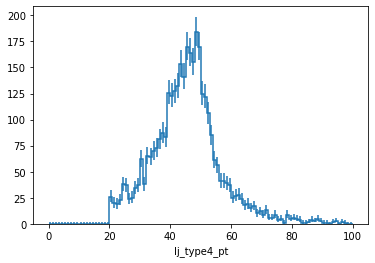

In [103]:
out[sample_name]["hists"]["lj_type4_pt"].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd7a795b5e0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

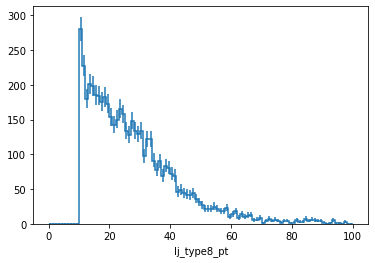

In [104]:
out[sample_name]["hists"]["lj_type8_pt"].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd7a75b0e50>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

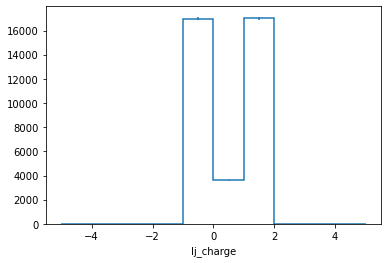

In [105]:
out[sample_name]["hists"]["lj_charge"].plot1d()

In [106]:
ljs = events.ljsource
#ljs = ak.mask(ljs, ak.num(ljs) >= 2)
ljs = ljs[ak.argsort(ljs.p4.pt, ascending=False)]
ljs.p4.pt[ak.num(ljs) >= 2, 1]
print(ak.num(ljs.p4.pt))
print(ak.num(ljs["type"]))

[2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 0, 2, 3, ... 0, 2, 2, 2, 3, 2, 2, 1, 1, 1, 3, 3, 1]
[2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 0, 2, 3, ... 0, 2, 2, 2, 3, 2, 2, 1, 1, 1, 3, 3, 1]


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd7a764c370>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

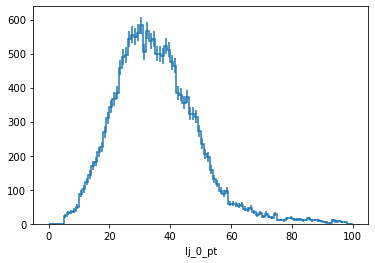

In [107]:
out[sample_name]["hists"]["lj_0_pt"].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd7a773cb50>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

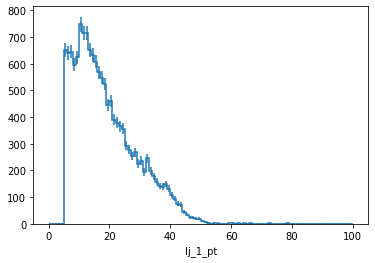

In [108]:
out[sample_name]["hists"]["lj_1_pt"].plot1d()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fd7a7462790>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

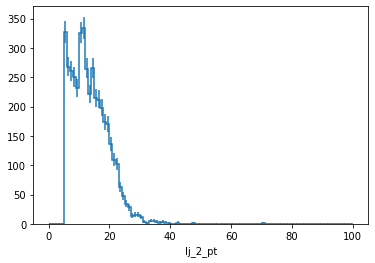

In [109]:
out[sample_name]["hists"]["lj_2_pt"].plot1d()